In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# data wrangling
import pandas as pd
import numpy as np

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# py files
import acquire
import prepare
import explore
import model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.acquire_agg_data()

In [3]:
df = prepare.prepare(df)

In [4]:
df = prepare.unique(df)

In [5]:
df = explore.remove_manufacturers(df)

In [6]:
df.head()

,serial_number,manufacturer,model,capacity_terabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4.0,0,5.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4.0,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3.0,0,4.8,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8.0,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3.0,0,5.5,0.0,NaN,NaN,0.0,0.0


In [7]:
df.manufacturer.value_counts()

Seagate            105136
Hitachi             51417
Western Digital      2826
Toshiba              2573
Dell                   60
Name: manufacturer, dtype: int64

In [8]:
df = prepare.treat_nulls(df)

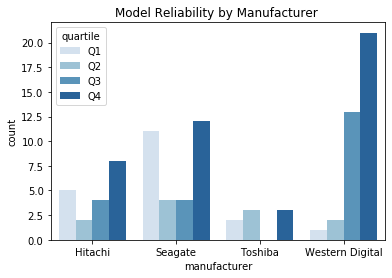

In [9]:
explore.get_manufacturer_graph(df)

In [10]:
def get_manufacturer_graph():

    

    sns.barplot(x='manufacturer', y='count', hue='quartile', data=df, palette='Blues')
    plt.title("Model Reliability by Manufacturer ")

In [11]:
sns.barplot(x='manufacturer', y='count', hue='quartile', data=df, palette='Blues')
plt.title("Model Reliability by Manufacturer ")

ValueError: Could not interpret input 'count'

In [ ]:
df.head()

In [ ]:
df_stack = df[['model','manufacturer','drive_age_in_years']]

In [ ]:
df_stack = df.groupby('model').agg({'manufacturer': 'max','drive_age_in_years':'median'})

In [ ]:
df_stack.head()

In [ ]:
df_stack = explore.get_quartile(df_stack)

In [ ]:
df_stack = df_stack.drop(columns=['drive_age_in_years','model'])
df_stack = df_stack.reset_index()

In [ ]:
df_stack = df_stack.drop(columns='model')

In [ ]:
df_stack['count']= 1

In [ ]:
df_stack

In [ ]:
df_stack = df_stack.groupby(['manufacturer','quartile']).count().reset_index()

In [ ]:
df_stack.manufacturer.value_counts()